# Deep Learning - Day 2 - Finetune your Neural Network

### Exercise objectives:
- Finetune the model optimizer
- Save and load a neural network

<hr>
<hr>

Now that you have mastered almost every part of Neural Networks, let's take a closer look at the `compile` part.

# Data

We will here use the data from the Boston Housing dataset

❓ **Question** ❓ First, load the data with the appropriate function 

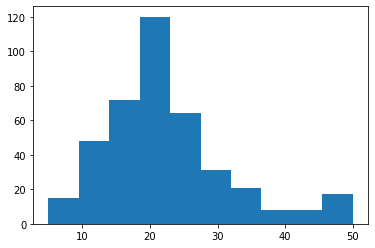

In [1]:
import numpy as np
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape

plt.hist(y_train)
plt.show()

❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your prediction corresponds to the mean value of $y$ computed on the train set?

In [2]:
### YOUR CODE HERE

In [3]:
##############
### Answer ###
##############

y_pred = np.mean(y_train)
print(f'The mean prediction is {y_pred:.3f}')

absolute_error = [np.abs(y - y_pred) for y in y_test]
mean_absolute_error = np.mean(absolute_error)

print(f'The benchmark mean absolute error is of {mean_absolute_error:.3f}')

The mean prediction is 22.395
The benchmark mean absolute error is of 6.533


# Part I: The model

❓ **Question** ❓ Now, write in a function `initialize_model` a neural network that has 3 layers: 
- a layer with 10 neurons and the `relu` activation function (appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

### YOUR CODE HERE

In [5]:
##############
### Answer ###
##############

def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu', input_dim=13))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    return model

# Part II : The optimizer

❓ **Question** ❓ Write a function that takes as argument a model and a name of optimizer, that compiles the model and returns it - select the loss and metrics wisely.

In [6]:
def compile_model(model, optimizer_name):
    
    ### YOUR CODE HERE
    
    return model

In [7]:
##############
### Answer ###
##############

def compile_model(model, optimizer_name):
    
    model.compile(loss='mse', 
                  optimizer=optimizer_name,
                  metrics=['mae'])
    
    return model

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. Evaluate your model on the test data.

Do not forget to use an early stopping criterion.

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

### YOUR CODE HERE

In [9]:
##############
### Answer ###
##############

model = initialize_model()
model = compile_model(model, 'adam')

es = EarlyStopping(patience=10)

model.fit(X_train, y_train, 
          batch_size=16, 
          epochs=1000, 
          validation_split=0.3,
          callbacks=[es], verbose=0)

model.evaluate(X_test, y_test, verbose=0)

[29.75165367126465, 3.981668472290039]

❓ **Question** ❓ Rerun the same model on the same data but with different optimizer (in a `for` loop). For each, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers))

In [10]:
### YOUR CODE HERE

def plot_loss_mae(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model Mean Absolute Error')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

Mean absolute error with the rmsprop optimizer: 4.4980


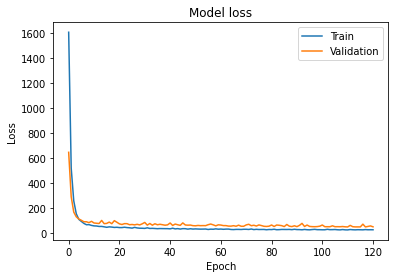

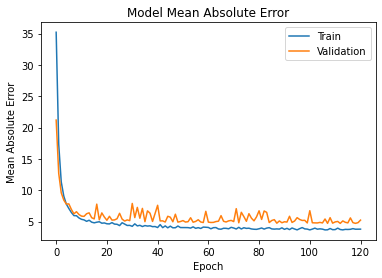

Mean absolute error with the adadelta optimizer: 8.9343


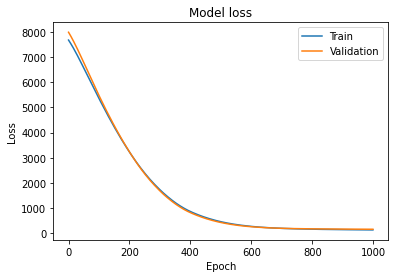

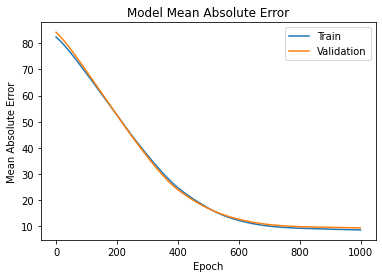

Mean absolute error with the adagrad optimizer: 6.4612


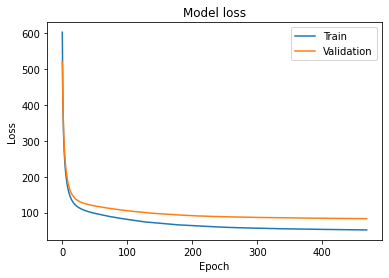

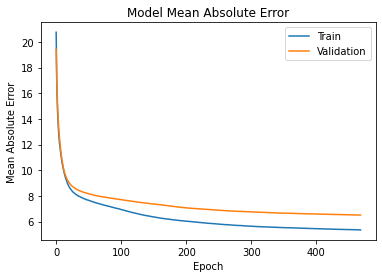

In [11]:
##############
### Answer ###
##############

for optimizer in ['rmsprop', 'adadelta', 'adagrad']:

    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=1000, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test, verbose=0)
    
    print(f'Mean absolute error with the {optimizer} optimizer: {res[1]:.4f}')
    plot_loss_mae(history)

❓ **Question** ❓ Are your predictions better than the benchmark prediction you evaluate at the beginning of the notebook?

❗ **Remark** ❗ Here, the optimizer is not central as the data are in low dimension and not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 


❗ **Remark** ❗ Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer rely on. Among this hyperparameters, there is quite an important one, the learning rate. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instanciate it with a learning rate of 0.1 - keep the other values to their default values.

In [12]:
from tensorflow.keras.optimizers import Adam

### YOUR CODE HERE

In [13]:
##############
### Answer ###
##############

adam = Adam(learning_rate=0.1)

❓ **Question** ❓ Use this optimizer in the `compile_model` function, fit the data and plot the history

In [14]:
### YOUR CODE HERE

Mean absolute error with a learning rate of 0.1 optimizer: 4.3863


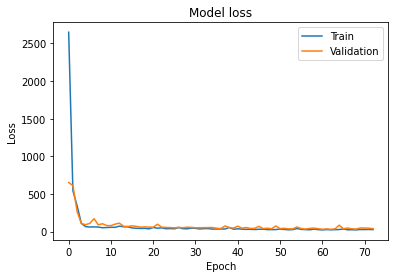

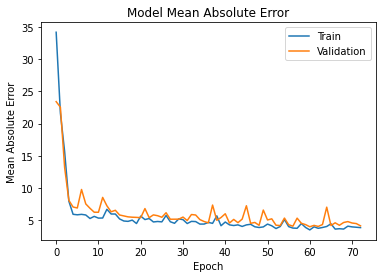

In [15]:
##############
### Answer ###
##############

model = initialize_model()
model = compile_model(model, adam)

es = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, 
                  batch_size=16, 
                  epochs=1000, 
                  validation_split=0.3,
                  callbacks=[es], verbose=0)

res = model.evaluate(X_test, y_test, verbose=0)

print(f'Mean absolute error with a learning rate of 0.1 optimizer: {res[1]:.4f}')
plot_loss_mae(history)

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

Remark: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

In [19]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

# for lr in learning_rates:
#     ### YOUR CODE HERE

Mean absolute error with a learning rate of 0.0001 optimizer: 21.4764


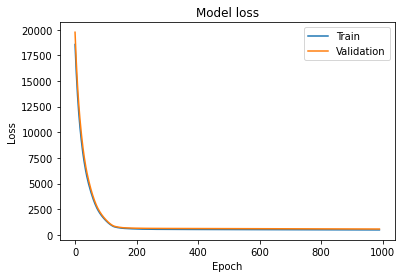

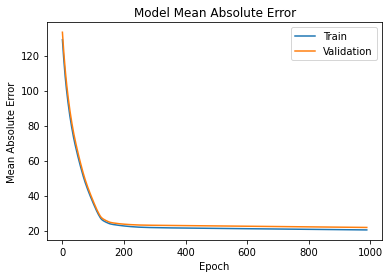

Mean absolute error with a learning rate of 0.001 optimizer: 4.6897


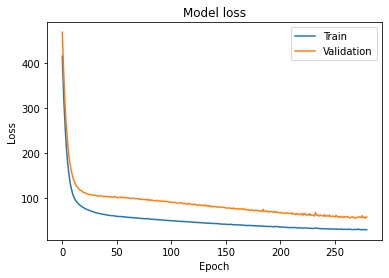

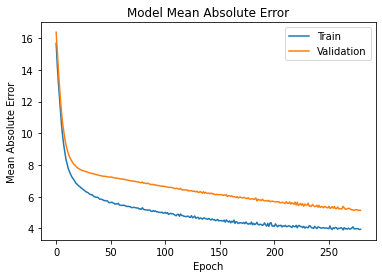

Mean absolute error with a learning rate of 0.01 optimizer: 4.5701


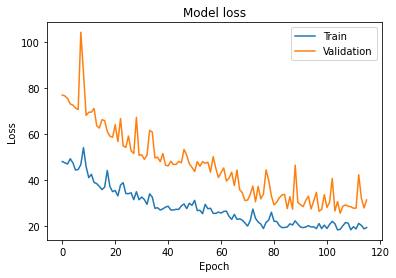

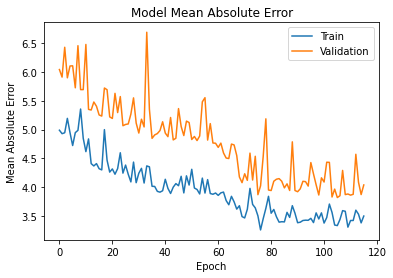

Mean absolute error with a learning rate of 0.1 optimizer: 4.7622


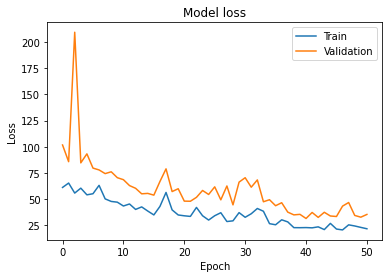

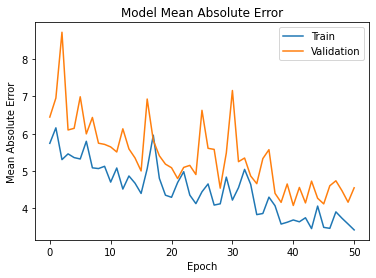

Mean absolute error with a learning rate of 1 optimizer: 6.5137


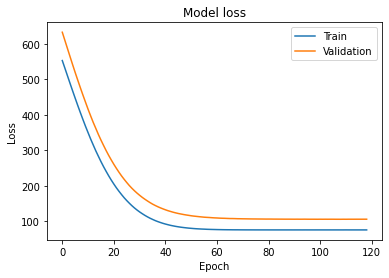

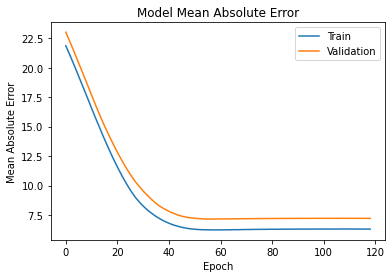

Mean absolute error with a learning rate of 5 optimizer: 6.5137


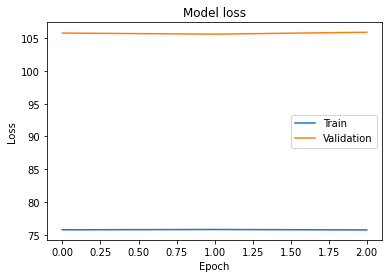

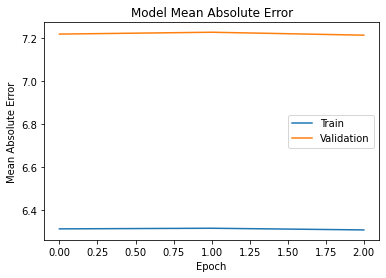

In [20]:
##############
### Answer ###
##############

### YOUR CODE HERE

def plot_loss_mae2(history):
    plt.plot(history.history['loss'][10:])
    plt.plot(history.history['val_loss'][10:])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'][10:])
    plt.plot(history.history['val_mae'][10:])
    plt.title('Model Mean Absolute Error')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

for lr in learning_rates:

    adam = Adam(learning_rate=lr)
    model = initialize_model()
    model = compile_model(model, adam)

    es = EarlyStopping(patience=10)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=1000, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test, verbose=0)

    print(f'Mean absolute error with a learning rate of {lr} optimizer: {res[1]:.4f}')
    plot_loss_mae2(history)

### Advanced & Optional

The next question is optional and intended for advanced users that are willing to go a step further in their Deep Learning skills. However, it is not essential and can be skiped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that you first need large learning rates, and as the neural network converges and get closer to the minimum, you decrease the value of the learning rate. This is called a scheduler. 

❓ **Question** ❓ Use the [exponential decay scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the adam optimizer and run it on the previous data. Plot the history and check how the loss and mae evolve.

In [21]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

### YOUR CODE HERE

Mean absolute error : 4.4489


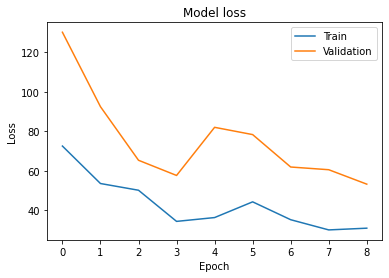

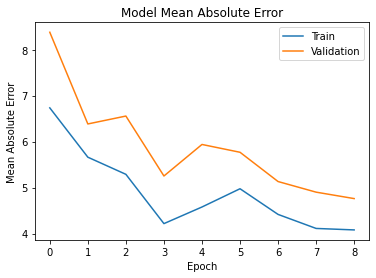

In [22]:
##############
### Answer ###
##############

initial_learning_rate = 0.05

lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.7,
)

adam = Adam(learning_rate=lr_schedule)

model = initialize_model()
model = compile_model(model, adam)

es = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, 
                  batch_size=16, 
                  epochs=1000, 
                  validation_split=0.3,
                  callbacks=[es], verbose=0)

res = model.evaluate(X_test, y_test, verbose=0)

print(f'Mean absolute error : {res[1]:.4f}')
plot_loss_mae2(history)

# Part II : The loss

It is important to clearly understand the different between metrics and loss. The loss are part of the metrics, therefore some metrics can be used as loss.

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`. In both case, report the final mean absolute error and compare the history.

In [ ]:
### YOUR CODE HERE

Mean Absolute Error : 42.0576 - Mean Squared Error : 4.4988


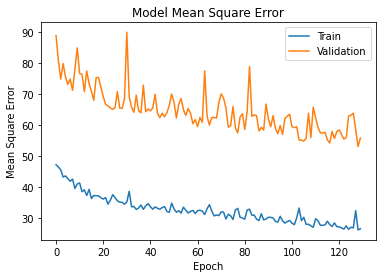

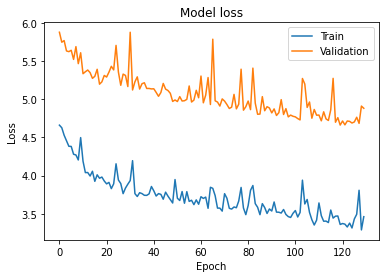

Mean Absolute Error : 41.4529 - Mean Squared Error : 4.5746


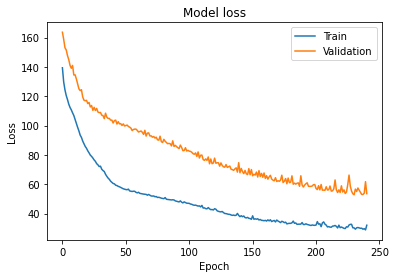

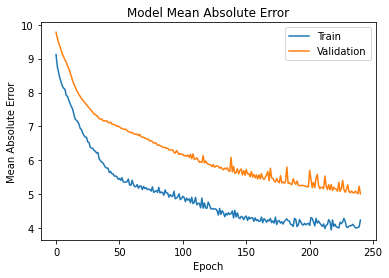

In [23]:
##############
### Answer ###
##############

def plot_loss_mae3(history):
    
    plt.plot(history.history['mse'][10:])
    plt.plot(history.history['val_mse'][10:])
    plt.title('Model Mean Square Error')
    plt.ylabel('Mean Square Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['loss'][10:])
    plt.plot(history.history['val_loss'][10:])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    



### First, optimizing the Mean Absolute error
model = initialize_model()
model.compile(loss='mae', optimizer='adam', metrics=['mse'])

es = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, 
                  batch_size=16, 
                  epochs=1000, 
                  validation_split=0.3,
                  callbacks=[es], verbose=0)

res = model.evaluate(X_test, y_test, verbose=0)

print(f'Mean Absolute Error : {res[1]:.4f} - Mean Squared Error : {res[0]:.4f}')
plot_loss_mae3(history)


### Second, optimizing the Mean Squared Error
model = initialize_model()
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

es = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, 
                  batch_size=16, 
                  epochs=1000, 
                  validation_split=0.3,
                  callbacks=[es], verbose=0)

res = model.evaluate(X_test, y_test, verbose=0)

print(f'Mean Absolute Error : {res[0]:.4f} - Mean Squared Error : {res[1]:.4f}')
plot_loss_mae2(history)

Finally, you see that even if the Mean Absolute Error is the final metric you optimize, it can be better for your algorithm to use the mean square error as the loss to optimize its weights and give the best MAE possible. 

# Part IV : Save and load a model

Here, we will see how to save a model, and load it afterwards.

❓ **Question** ❓ Rerun any model you want and evaluate it on the test set.

In [ ]:
### YOUR CODE HERE

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

❓ **Question** ❓ Now, save the model thanks to the `save_model` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model).

In [ ]:
### YOUR CODE HERE

In [ ]:
##############
### Answer ###
##############

models.save_model(model, 'my_model')

❓ **Question** ❓ Now, in a variable `loaded_model`, load the model you just saved thanks to the `load_model` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to see that it gives the same result as before.

In [ ]:
### YOUR CODE HERE

In [ ]:
##############
### Answer ###
##############

loaded_model = models.load_model('my_model')
loaded_model.evaluate(X_test, y_test, verbose=0)

# Part V : Use regularizers [ Advanced ]

In this part of the notebook, we will see how to use regularizers in a neural network. Regularizers are used to prevent overfitting that can happends because very complex networks have many many parameters which tends to overfit the training data.

❓ **Question** ❓ First, initialize a model that has a lot of parameters (many layers and/or many neurons) such that it overfits the training data (to better see the effect, do not use any early stopping criterion). 

NB: You can use the `validation_data` (instead of `validation_split`) to compute the error on the test set at each epoch.



<details>
    <summary>(It might be not easy to overfit as the data as quite small - in term of number of features. Click here to get some hints)</summary>
If you choose a neural networkk with the following layers:
    
    - 1000 neurons
    
    - 1000 neurons
    
    - 750 neurons
    
    - 750 neurons
    
    - 500 neurons
    
    - 500 neurons
    
And more than 2000 epochs (it will take some time to train),
you should see some overfitting of the training data, meaning that the accuracy on the test lost will get worse at some point.
</details>

In [ ]:
### YOUR CODE HERE

In [24]:
def plot_loss_mae4(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='best')
    plt.show()
    
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('Model Mean Absolute Error')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='best')
    plt.show()

def initialize_model_2():
    model = models.Sequential()
    model.add(layers.Dense(1000, activation='relu', input_dim=13))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(750, activation='relu'))
    model.add(layers.Dense(750, activation='relu'))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mae', optimizer='adam', metrics=['mse'])
    
    return model

model = initialize_model_2()

history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                  batch_size=16, 
                  epochs=4000, 
                  verbose=0)

res = model.evaluate(X_test, y_test, verbose=0)

print(f'Mean Absolute Error : {res[0]:.4f} - Mean Squared Error : {res[1]:.4f}')
plot_loss_mae4(history)

KeyboardInterrupt: 

In your overparametrized network, some neurons got too specific to given training data, preventing the network from generalizing to new data. This lead to some overfitting. 

For that reason, we will use dropout layers, whose role is to _cancel_ the output of some neurons  during the training part. By doing this at random, it prevents the network from getting too specific to the input data : no any neuron can be too specific to a given input as its output is sometimes cancelled by the dropout layer. Overall, it forces the information that is contain in one input sample to go through multiple neurons instead of only one specific.

❓ **Question** ❓ Try adding dropout layers to your neural network and look at the effect on the loss on the test set.

In [ ]:
# YOUR CODE HERE

In [ ]:
def initialize_model_3():
    model = models.Sequential()
    model.add(layers.Dense(1000, activation='relu', input_dim=13))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(750, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(750, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mae', optimizer='adam', metrics=['mse'])
    
    return model

model = initialize_model_3()

history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                  batch_size=16, 
                  epochs=4000, 
                  verbose=0)

res = model.evaluate(X_test, y_test, verbose=0)

print(f'Mean Absolute Error : {res[0]:.4f} - Mean Squared Error : {res[1]:.4f}')
plot_loss_mae4(history)

There are other ways to prevent overfitting in a neural network. The standard one (apart Dropout) is to regularize the outputs of a layer, as in linear regression regularization where the weights of the linear regression are constrained by L1, L2 or L1 and L2 norms.

Such regularization can be done at each layer for:
- all the biases of the layer, with `bias_regularizer` argument
- all the weights of the layer, with the `kernel_regularizer` argument
- the outputs of the layer (after the activity function) with the `activity_regularizer` argument

❓ **Question** ❓ Add some of the previous regularizers to the Dense layers of your previous neural networks - and without dropout layers, as it can interact in a way that you are not sure of. 

In [ ]:
from tensorflow.keras import regularizers

# YOUR CODE HERE

In [ ]:
from tensorflow.keras.regularizers import Regularizer

def initialize_model_4():
    model = models.Sequential()
    reg_l1 = regularizers.l1(0.001)
    reg_l2 = regularizers.l2(0.001)
    reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.0001)
    
    model.add(layers.Dense(1000, activation='relu', input_dim=13))
    model.add(layers.Dense(1000, activation='relu', kernel_regularizer=reg_l1))
    model.add(layers.Dense(750, activation='relu'))
    model.add(layers.Dense(750, activation='relu', bias_regularizer=reg_l2))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dense(500, activation='relu', activity_regularizer=reg_l1_l2))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mae', optimizer='adam', metrics=['mse'])
    
    return model

model = initialize_model_4()

Remark: You probably have seen very little difference in the previous examples. This is due to the simplicity of the data. However, in other cases, especially in the last exercice (open challenge), the data are more complex, and for some architectures, you might encounter overfitting that you can prevent thanks to regularization techniques as overfitting or L1/L2 regularizations.

# Part VI : Get the best Mean Absolute Error

From here, you are free to:
- design your own architecture: number of layers, number of neurons, activation function
- choose the loss and metric
- choose the optimizer and tune its hyperparameters
- select the best options for the early stopping criterion

to get the best mean absolute error.

Once you have your best score on the test set, include the whole pipeline into a proper cross validation to report your score (mean ± std).
